<a href="https://colab.research.google.com/github/DmitryKutsev/NIS_SentiFrame/blob/master/21_04_dataframe_and_fasttext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!wget https://rusvectores.org/static/models/rusvectores4/fasttext/araneum_none_fasttextcbow_300_5_2018.tgz

!wget http://vectors.nlpl.eu/repository/20/187.zip

--2020-04-27 21:54:50--  http://vectors.nlpl.eu/repository/20/187.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.225
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2692389554 (2.5G) [application/zip]
Saving to: ‘187.zip’

187.zip             100%[===================>]   2.51G  9.88MB/s    in 4m 41s  

2020-04-27 21:59:32 (9.14 MB/s) - ‘187.zip’ saved [2692389554/2692389554]



In [2]:
!ls

187.zip  sample_data


In [3]:
!wget https://raw.githubusercontent.com/nicolay-r/RuSentiFrames/master/collection.json

--2020-04-27 21:59:36--  https://raw.githubusercontent.com/nicolay-r/RuSentiFrames/master/collection.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 674938 (659K) [text/plain]
Saving to: ‘collection.json’

collection.json     100%[===================>] 659.12K  --.-KB/s    in 0.06s   

2020-04-27 21:59:37 (10.4 MB/s) - ‘collection.json’ saved [674938/674938]



In [4]:
!pip install pymorphy2[fast]

     |████████████████████████████████| 51kB 1.7MB/s 
     |████████████████████████████████| 7.1MB 6.6MB/s 
     |████████████████████████████████| 378kB 46.6MB/s 
  Created wheel for DAWG: filename=DAWG-0.8.0-cp36-cp36m-linux_x86_64.whl size=849406 sha256=d41ae0197bbac33480d8ddebf547435bf10cb9f6a0548d81debcab1d1d0deb1a
  Stored in directory: /root/.cache/pip/wheels/3d/1f/f0/a5b1f9d02e193c997d252c33d215f24dfd7a448bc0166b2a12
Successfully built DAWG


In [0]:
# !gunzip araneum_none_fasttextcbow_300_5_2018.tgz
# !tar -xvf araneum_none_fasttextcbow_300_5_2018.tar

In [10]:
!unzip 187.zip

Archive:  187.zip
replace meta.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace meta.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: meta.json               
replace model.model? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: model.model             
replace model.model.vectors_ngrams.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: model.model.vectors_ngrams.npy  y

  inflating: model.model.vectors.npy  
  inflating: model.model.vectors_vocab.npy  
  inflating: README                  


In [11]:
!ls

187.zip		 model.model			 model.model.vectors_vocab.npy
collection.json  model.model.vectors_ngrams.npy  README
meta.json	 model.model.vectors.npy	 sample_data


In [0]:
from collections import Counter
import json
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
import pymorphy2
import gensim
morph = pymorphy2.MorphAnalyzer()

In [13]:
#fasttext_model = gensim.models.KeyedVectors.load("araneum_none_fasttextcbow_300_5_2018.model", mmap='r')
fasttext_model = gensim.models.KeyedVectors.load("model.model")

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
positive_multi_seed = ['одобрять', 'хвалить', 'поощрять', 'любить']
negative_multi_seed = ['ненавидеть', 'убить', 'ругать', 'злиться']
positive_single_seed = ['ценить']
negative_single_seed = ['убивать']
def make_seed_embedding(seed_dict, model):
  '''
  Принимает на вход список, на выходе дает средний вектор всех слов из этого списка
  '''
  summ = 0
  # if model == skipgram_model:
  #   for verb in seed_dict:
  #     summ = summ + model[verb + '_V']
  #   vector = summ/len(seed_dict)
  # else:
  for verb in seed_dict:
    summ = summ + model.get_vector(verb)
  vector = summ/len(seed_dict)

  return vector

positive_multi_embedding = make_seed_embedding(positive_multi_seed, fasttext_model)
negative_multi_embedding = make_seed_embedding(negative_multi_seed, fasttext_model)
positive_single_embedding = make_seed_embedding(positive_single_seed, fasttext_model)
negative_single_embedding = make_seed_embedding(negative_single_seed, fasttext_model)

In [0]:
dima = pd.read_csv('https://raw.githubusercontent.com\
/DmitryKutsev/NIS_SentiFrame/master/annotations/polarity_annotation/polar_annotation_dima.csv')

ira = pd.read_csv('https://raw.githubusercontent.com/DmitryKutsev/NIS_SentiFrame/master/\
annotations/polarity_annotation/polar_annotation_ira.csv')


masha = pd.read_csv('https://raw.githubusercontent.com/DmitryKutsev/NIS_SentiFrame/master/annotations/\
polarity_annotation/polar_annotation_masha.csv')

In [44]:
masha.head()

,verb,tonality,polarity
0,агитировать,1,1.0
1,адаптироваться,1,1.0
2,арестовать,6,0.0
3,арестовывать,6,0.0
4,атаковать,6,0.0


In [45]:
dima.head()

,verb,tonality,polarity
0,агитировать,1,1
1,адаптироваться,1,0
2,арестовать,6,0
3,арестовывать,6,0
4,атаковать,6,0


In [46]:
ira.head()

,verb,tonality,polarity
0,агитировать,1,0
1,адаптироваться,1,1
2,арестовать,6,0
3,арестовывать,6,0
4,атаковать,6,0


In [47]:
dima['polarity']

0      1
1      0
2      0
3      0
4      0
      ..
566    0
567    0
568    0
569    0
570    0
Name: polarity, Length: 571, dtype: int64

In [48]:
int(str(masha['polarity'][1])[0])

1

In [101]:
all_dict = Counter()
for i in range(len(dima['polarity'])):
  if int(dima['polarity'][i]) > 0:
    all_dict[dima['verb'][i]] = [1,int(dima['tonality'][i])]
  else:
    all_dict[dima['verb'][i]] = [0,int(dima['tonality'][i])]

for i in range(len(masha['polarity'])):
  try:
    if int(str(masha['polarity'][i])[0]) > 0:
      if all_dict[masha['verb'][i]]:
        all_dict[masha['verb'][i]][0] += 1
      else:
        all_dict[masha['verb'][i]] = [1, masha['tonality'][i]]
  except Exception as e:
    pass
    # print(e)

for i in range(len(ira['polarity'])):
  if int(ira['polarity'][i]) > 0:
    if all_dict[ira['verb'][i]]:
      all_dict[ira['verb'][i]][0] += 1
    else:
      all_dict[ira['verb'][i]] = [1, ira['tonality'][i]]
all_dict

Counter({'агитировать': [2, 1],
         'адаптироваться': [2, 1],
         'арестовать': [0, 6],
         'арестовывать': [0, 6],
         'атаковать': [0, 6],
         'бастовать': [1, 6],
         'беречь': [3, 3],
         'беспокоить': [0, 6],
         'беспокоиться': [1, 1],
         'бить': [0, 6],
         'благодарить': [3, 6],
         'благословить': [3, 3],
         'блокировать': [0, 3],
         'болеть': [0, 3],
         'бомбить': [0, 6],
         'бороться': [0, 3],
         'бояться': [0, 6],
         'бросаться': [0, 1],
         'бросить': [0, 1],
         'бушевать': [0, 3],
         'вдохновить': [3, 6],
         'вдохновлять': [3, 3],
         'велеть': [0, 0],
         'верить': [3, 1],
         'взбунтоваться': [0, 3],
         'взволновать': [0, 3],
         'взламывать': [0, 3],
         'взломать': [0, 6],
         'взорвать': [0, 6],
         'взрывать': [0, 6],
         'винить': [0, 6],
         'влюбляться': [3, 6],
         'воевать': [0, 3],
         '

In [0]:
#cosine_similarity(np.atleast_2d(fasttext_model.get_vector('убить')), np.atleast_2d(positive_multi_embedding))[0][0]

In [103]:
for verb in all_dict.keys():
  #print(verb)
  try:
    pos_multi_distnce = cosine_similarity(np.atleast_2d(fasttext_model.get_vector(verb)), np.atleast_2d(positive_multi_embedding))
    neg_multi_distnce = cosine_similarity(np.atleast_2d(fasttext_model.get_vector(verb)), np.atleast_2d(negative_multi_embedding))
    if pos_multi_distnce >  neg_multi_distnce:
      all_dict[verb].append(1)
      all_dict[verb].append(pos_multi_distnce[0][0])
    else:
      all_dict[verb].append(0)
      all_dict[verb].append(neg_multi_distnce[0][0])
  except (KeyError, AttributeError) as e:
    all_dict[verb].append(None)
    all_dict[verb].append(None)
print(len(all_dict))
all_dict  


571


Counter({'агитировать': [2, 1, 1, 0.560042],
         'адаптироваться': [2, 1, 1, 0.37280977],
         'арестовать': [0, 6, 1, 0.32922238],
         'арестовывать': [0, 6, 0, 0.2764541],
         'атаковать': [0, 6, 0, 0.43879205],
         'бастовать': [1, 6, 1, 0.5433168],
         'беречь': [3, 3, 1, 0.3314487],
         'беспокоить': [0, 6, 0, 0.64266306],
         'беспокоиться': [1, 1, 0, 0.6330671],
         'бить': [0, 6, 0, 0.7078174],
         'благодарить': [3, 6, 1, 0.6103345],
         'благословить': [3, 3, 1, 0.5627217],
         'блокировать': [0, 3, 1, 0.34100074],
         'болеть': [0, 3, 0, 0.51973534],
         'бомбить': [0, 6, 0, 0.47332618],
         'бороться': [0, 3, 0, 0.5707658],
         'бояться': [0, 6, 0, 0.6446858],
         'бросаться': [0, 1, 0, 0.5494606],
         'бросить': [0, 1, 0, 0.5540934],
         'бушевать': [0, 3, 0, 0.54600906],
         'вдохновить': [3, 6, 1, 0.60600215],
         'вдохновлять': [3, 3, 1, 0.61520135],
         'велеть'

In [0]:
# for verb in all_dict.keys():
#   #print(verb)
#   try:
#     pos_multi_distnce = cosine_similarity(np.atleast_2d(fasttext_model.get_vector(verb)), np.atleast_2d(positive_multi_embedding))
#     neg_multi_distnce = cosine_similarity(np.atleast_2d(fasttext_model.get_vector(verb)), np.atleast_2d(negative_multi_embedding))
#     if pos_multi_distnce >  neg_multi_distnce:
#       all_dict[verb].append(1)
#     else:
#       all_dict[verb].append(0)
#     all_dict[verb].append(np.atleast_2d(fasttext_model.get_vector(verb))
#   except (KeyError, AttributeError) as e:
#     all_dict[verb].append(3)
# all_dict  

In [105]:
full_df = pd.DataFrame(columns=('verb', 'manual_tonality', 'fasttext_tonality', 'manual_polarity', 'fasttext_polarity'))
#pos - 1, neg - 0, 3 - not in model
hit_dict = Counter(['pos_hit', 'neg_hit', 'pos_diff', 'neg_diff'])
for i in all_dict.keys():
  if all_dict[i][0] >= 2:
    if  all_dict[i][2] == 1:
      hit_dict['pos_hit'] += 1
    else:
      hit_dict['pos_diff'] += 1
    full_df = full_df.append({'verb': i, 'manual_tonality': (all_dict[i][1])/6, 'fasttext_tonality': all_dict[i][3], \
                              'manual_polarity': 1, 'fasttext_polarity': all_dict[i][2]}, ignore_index=True)

  else:
    full_df = full_df.append({'verb': i, 'manual_tonality': (all_dict[i][1])/6, 'fasttext_tonality': all_dict[i][3], \
                              'manual_polarity': 0, 'fasttext_polarity': all_dict[i][2]}, ignore_index=True)
    if  all_dict[i][2] == 0:
      hit_dict['neg_hit'] += 1
    else:
      hit_dict['neg_diff'] += 1

hit_dict


Counter({'neg_diff': 104, 'neg_hit': 292, 'pos_diff': 41, 'pos_hit': 138})

In [108]:
full_df.head(5)

,verb,manual_tonality,fasttext_tonality,manual_polarity,fasttext_polarity
0,агитировать,0.166667,0.560042,1,1
1,адаптироваться,0.166667,0.372810,1,1
2,арестовать,1.000000,0.329222,0,1
3,арестовывать,1.000000,0.276454,0,0
4,атаковать,1.000000,0.438792,0,0


In [0]:
import matplotlib.pyplot as plt

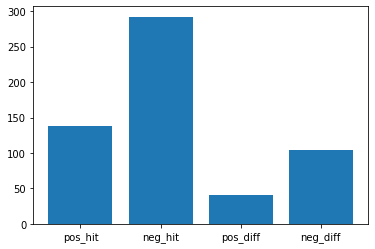

In [110]:
plt.bar(*zip(*hit_dict.items()))
plt.show()

In [0]:
full_df.to_csv(r'full_df.csv', index = False)

In [0]:
from google.colab import files

files.download('full_df.csv')